# Cargo librerías



In [1]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.naive_bayes import GaussianNB #clasificador bayesiano ingenuo
# se pueden probar otros, por ej. MultinomialNB.
# La lista completa está acá: https://scikit-learn.org/stable/modules/naive_bayes.html

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (8,8)

# Datos y exploración

In [2]:

datos = np.genfromtxt('./ddbb-correr-bayes-ingenuo.csv',delimiter=',', skip_header=1)#, usecols = (1,2,3,4) )
datos1 = np.genfromtxt('./ddbb-correr-bayes-ingenuo.csv',delimiter=',', skip_header=1)#, usecols = (1,2,3,4) )
#elimina todas las filas con "nan"
datos = datos[~np.isnan(datos).any(axis=1)]


# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# print(X.shape)
# print(X[0:5,:])

# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]
# print(y.shape)
# print(y[0:5])


# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X) #calcula promedio y desvío
X = scaler.transform(X) #estandariza con promedio y desvío antes calculado
print(datos)

[[8.31676588e+00 2.14373394e+02 2.20184174e+04 ... 1.00341674e+02
  4.62877054e+00 0.00000000e+00]
 [9.09222346e+00 1.81101509e+02 1.79789863e+04 ... 3.19979927e+01
  4.07507543e+00 0.00000000e+00]
 [5.58408664e+00 1.88313324e+02 2.87486877e+04 ... 5.49178618e+01
  2.55970823e+00 0.00000000e+00]
 ...
 [1.14910109e+01 9.48125452e+01 3.71888260e+04 ... 4.15585007e+01
  4.36926431e+00 1.00000000e+00]
 [6.06961576e+00 1.86659040e+02 2.61387802e+04 ... 6.04199211e+01
  3.66971170e+00 1.00000000e+00]
 [4.66810169e+00 1.93681735e+02 4.75809916e+04 ... 6.66876948e+01
  4.43582091e+00 1.00000000e+00]]


# Clasificador bayesiano ingenuo

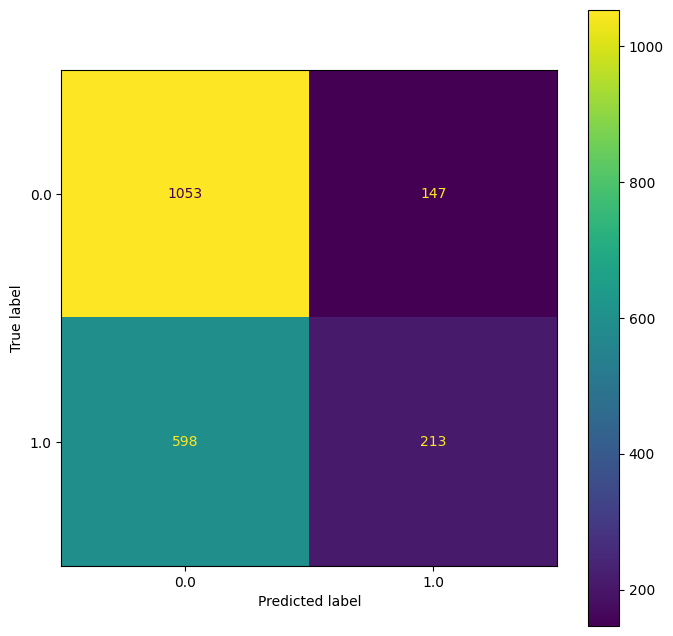

In [3]:
gnb = GaussianNB() #instancio la clase
modelo_gnb = gnb.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred = modelo_gnb.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# Es una mala idea predecir con los mismos datos de entrenamiento: recordar que el objetivo es
# predecir la clasif. de datos NUEVOS no utilizados para entrenar el modelo.
# Por ahora lo dejamos así, pero pueden investigar si quieren y pueden.

# matriz de confusión
conf = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_)
disp.plot(values_format='d') 

# Clasificación por punto de corte arbitrario

[[0.651 0.349]
 [0.706 0.294]
 [0.716 0.284]
 [0.582 0.418]
 [0.618 0.382]
 [0.655 0.345]
 [0.633 0.367]
 [0.385 0.615]
 [0.465 0.535]
 [0.414 0.586]
 [0.625 0.375]
 [0.634 0.366]
 [0.515 0.485]
 [0.649 0.351]
 [0.705 0.295]
 [0.684 0.316]
 [0.6   0.4  ]
 [0.534 0.466]
 [0.75  0.25 ]
 [0.763 0.237]]


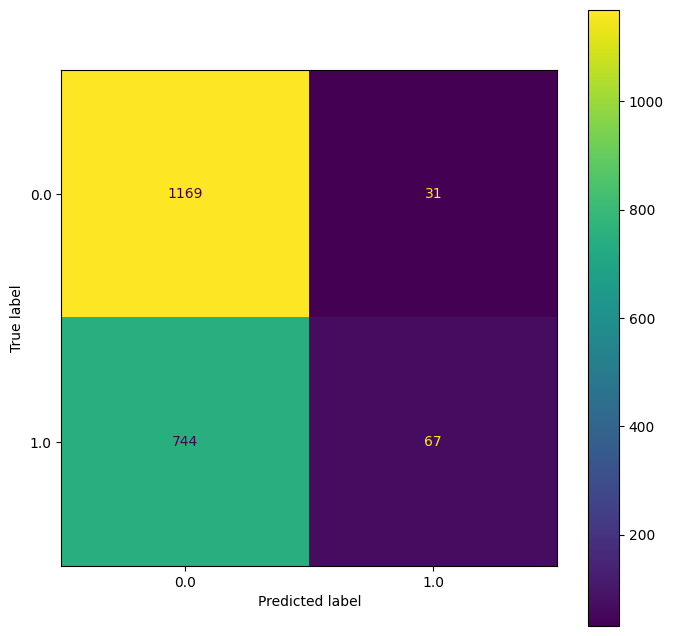

In [4]:
probas = gnb.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=3, suppress=True):
    print(probas[0:20])

# por ejemplo, por defecto asumo que SÍ tiene riesgo cardíco (y=1)
y_pred_07 = np.ones(y_pred.shape)

#y si la probabilidad de no tener es mayor a 0.7, lo clasifico como sin riesgo (y=0)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.3): # ACA CAMBIAR!!!!!!!!!
        y_pred_07[i]=0.
# lo anterior se puede hacer más copado con listas por comprensión
# https://realpython.com/list-comprehension-python/
# https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion10/listas_comprension.html


conf_07 = confusion_matrix(y,y_pred_07)

disp_07 = ConfusionMatrixDisplay(confusion_matrix=conf_07, display_labels=gnb.classes_)
disp_07.plot(values_format='d') 

# Visualizar resultados por Componentes principales

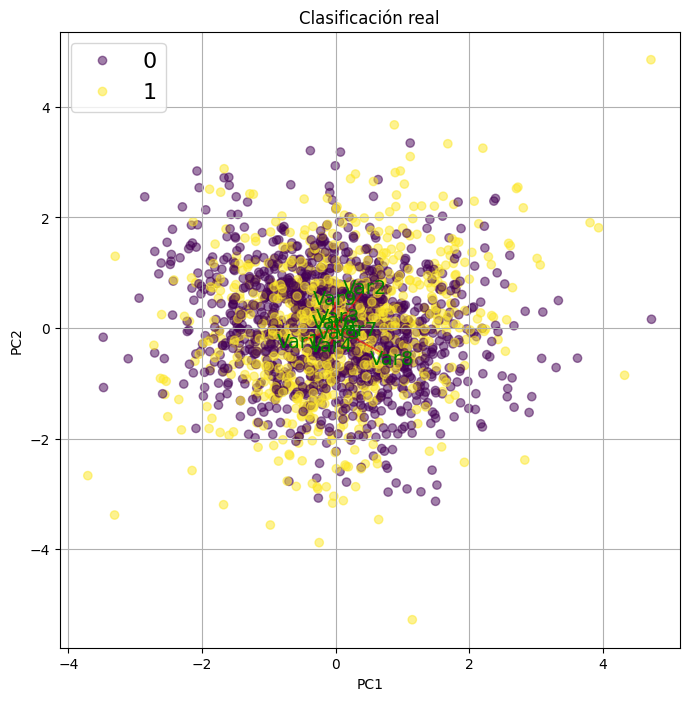

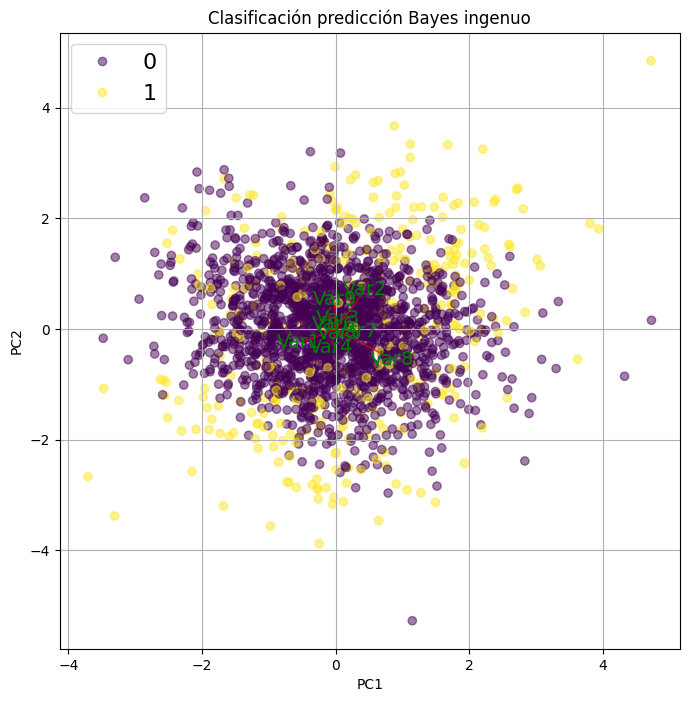

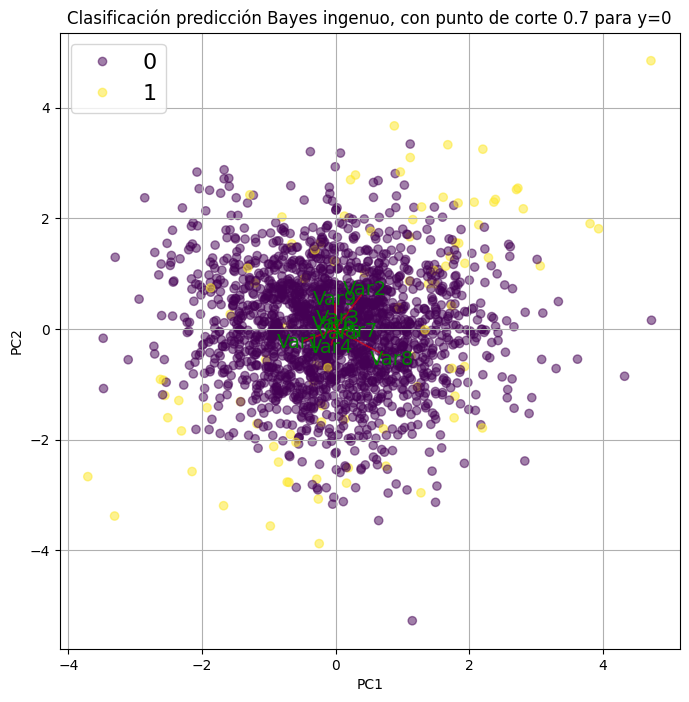

In [5]:
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)


def myplot(score,coeff,clases,labels=None):
    plt.figure()
    
    x1 = score[:,0]
    x2 = score[:,1]
    n = coeff.shape[0]

    scatter = plt.scatter(x1, x2, c=clases, alpha=0.5)#, cmap=colours)
    
    # print(scatter.legend_elements())
    # muestra etiquetas de las clases de la clasificación
    plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

    # flechas de las proyecciones de las variables originales
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center', fontsize=14)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center', fontsize=14)



# Definir nombres de las variables (puedes personalizarlos si tienes los nombres reales)
nombres = [f"Var{i+1}" for i in range(X.shape[1])]

#Grafico las primeras dos componentes principales para cada clasificación

#clasificación real
myplot(x_new[:,0:2], pca.components_, y, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación real")
plt.grid()
plt.show()

#clasificación bayes ingenuo
myplot(x_new[:,0:2], pca.components_, y_pred, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Bayes ingenuo")
plt.grid()
plt.show()

#clasif. bayes ingenuo con punto de corte 0.7 para y=0
myplot(x_new[:,0:2], pca.components_, y_pred_07, nombres)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Clasificación predicción Bayes ingenuo, con punto de corte 0.7 para y=0")
plt.grid()
plt.show()
